### Business challenge and objectives

We work for a fintech company that specializes in loands. It offers low APR loans to applicants based on their financial habits. The company has partnered with a peer-to-peer lending marketplace that provides real time loan applicants.


We aim to develop a model to predict whether loan applicant will complete the electronic signature phase of the loan application. The company will leverage the model to identify "low quality" applicants and experiment with different onboarding screens.

Our dataset includes features such as:
- Age

- Pay schedule (weekly, monthly, bi-weekly, semi-monthly etc.)

- Home owner (y/n)

- Has debt

- Annual income

- Years of employment

- Time user has had a personal bank account 

- Risk score 

- e-signed (y/n) = our response variable

etc...


Our dataset has 908 entries and 21 columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("P39-Financial-Data.csv")
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
dataset.info()
# note all columns are numeric except pay_schedule

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [4]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


### Exploratory data analysis

In [5]:
dataset.isna().any()
# we notice there are no missing values

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

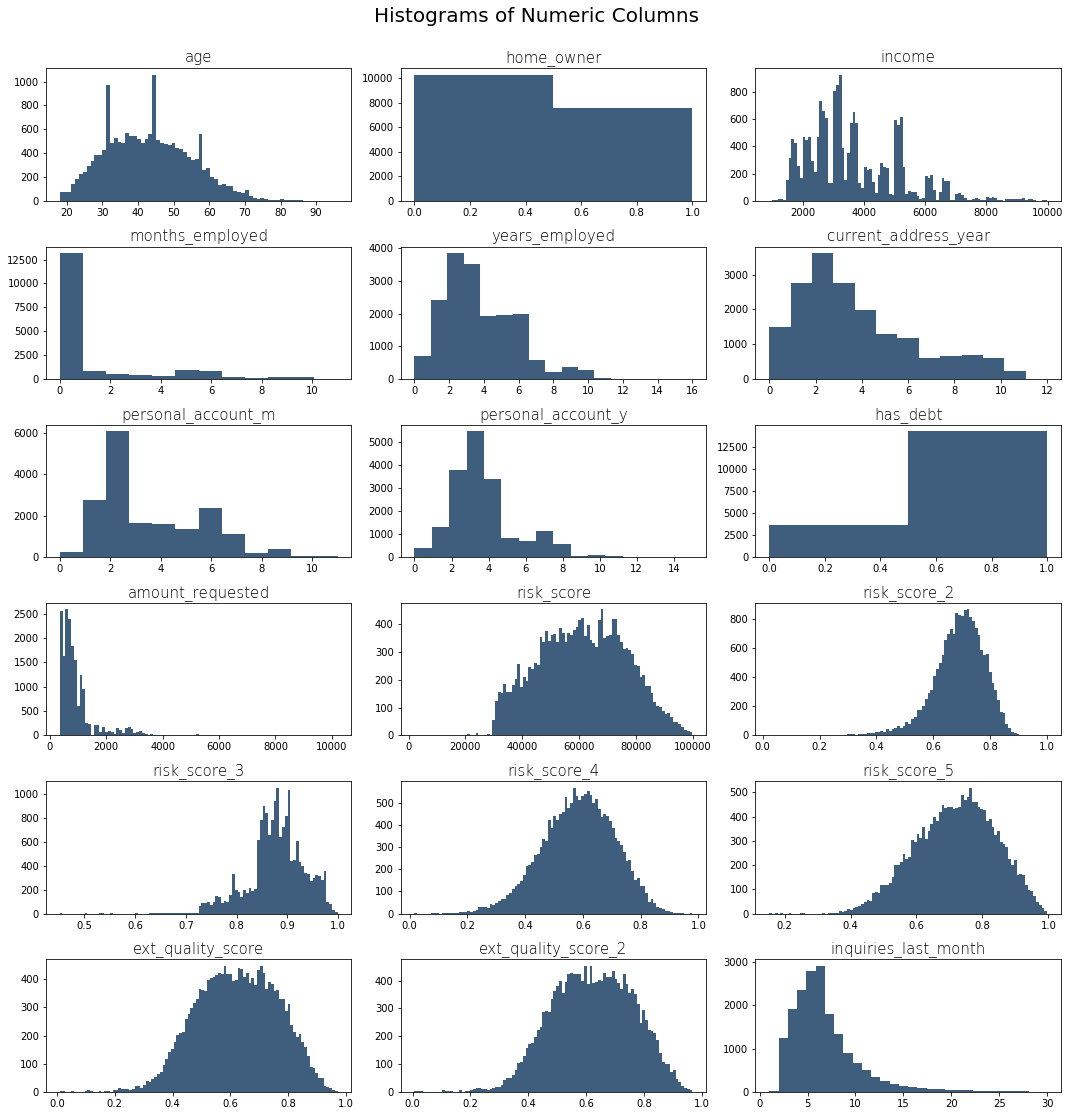

In [6]:
dataset2 = dataset.drop(columns = ["entry_id", "pay_schedule", "e_signed"])

subplot_title_info = {'fontsize': 15,
        'fontweight' : 5,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}

plt.figure(figsize = (15, 15))
plt.suptitle("Histograms of Numeric Columns", fontsize = 20, 
             x = 0.5, y = 1.53)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i], subplot_title_info)
    
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins = vals, color = "#3F5D7D")
plt.tight_layout(rect = [0, 0.5, 1, 1.5])

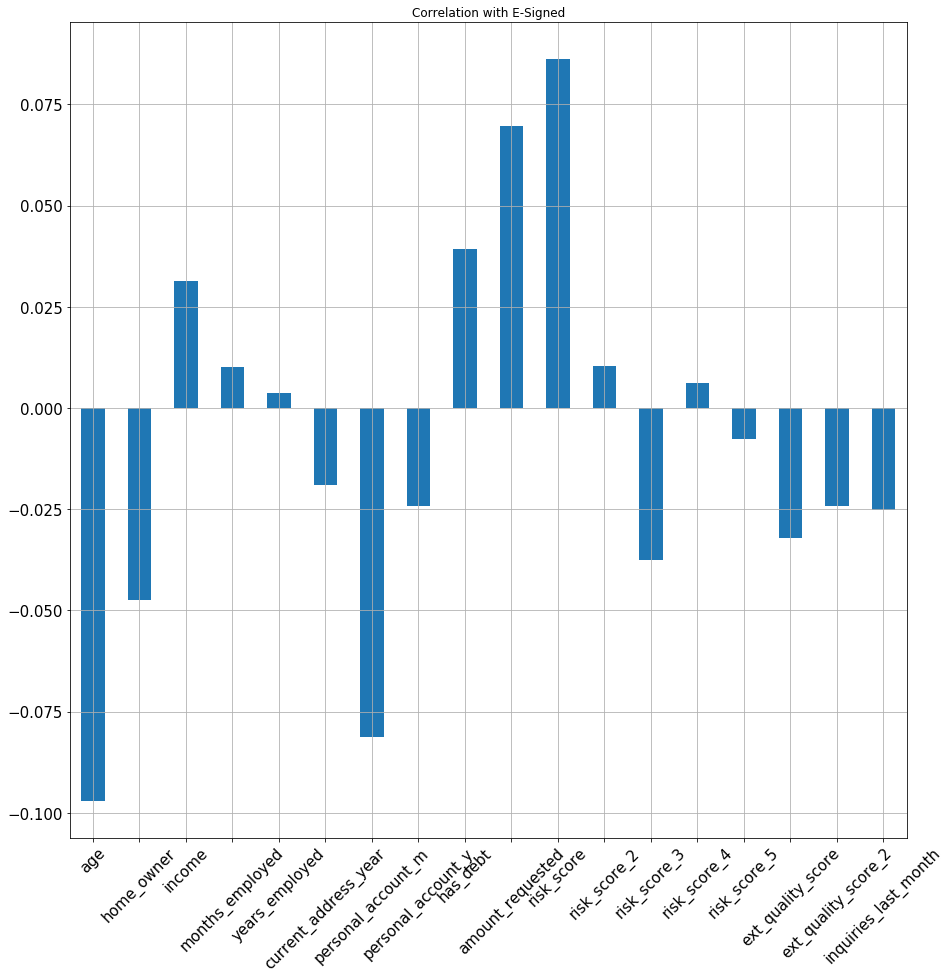

In [7]:
# Correlation with Response Variable
dataset2.corrwith(dataset.e_signed).plot.bar(figsize = (15, 15),
                                            title = "Correlation with E-Signed",
                                            fontsize = 15,
                                            rot = 45,
                                            grid = True)

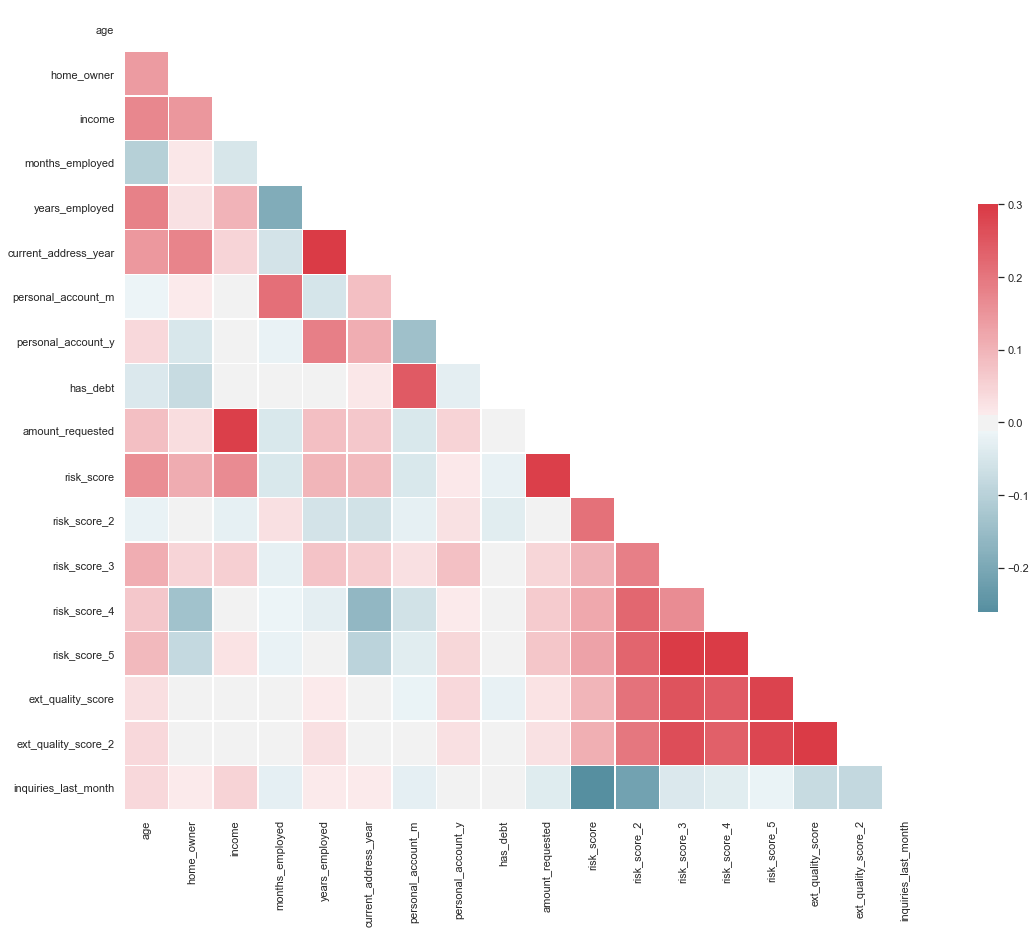

In [8]:
# Correlation matrix
sns.set(style = "white")

# Compute correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up matplotlib figure
f, ax = plt.subplots(figsize = (18, 15))

# Generate a customized diverging colormap
cmap = sns.diverging_palette(h_neg = 220, h_pos = 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidth = .5, cbar_kws = {"shrink": .5})

### Feature engineering

In [9]:
import random
import time
random.seed(100)

In [10]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [11]:
dataset["months_employed"].value_counts()
# this column is mostly 0s so we don't expect it to be useful
# in our model

0     13201
5       942
1       866
6       842
2       516
3       416
4       309
9       222
10      209
7       199
8       144
11       42
Name: months_employed, dtype: int64

In [12]:
dataset = dataset.drop(columns = ["months_employed"])

In [13]:
dataset["personal_account_months"] = (dataset.personal_account_m + (dataset.personal_account_y * 12))

In [14]:
dataset = dataset.drop(columns = ["personal_account_y"])

In [15]:
dataset = dataset.drop(columns = ["personal_account_m"])

In [16]:
dataset.head(10)

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98
5,8492423,21,weekly,0,2303,5,8,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,86
6,7948313,26,bi-weekly,0,2795,4,4,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,73
7,4297036,43,bi-weekly,0,5000,2,1,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,25
8,6493191,32,semi-monthly,0,5260,0,3,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3,1,49
9,8908605,51,bi-weekly,1,3055,6,11,1,600,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1,28


In [17]:
# One Hot Encoding
# Convert categorical variables into dummy/indicator variables.
dataset = pd.get_dummies(data = dataset)
dataset.columns

# we need to remove one of the categorical variables to preserve
# linear independence of the factors

dataset = dataset.drop(columns = "pay_schedule_semi-monthly")

In [18]:
# We remove columns that are not strictly useful for our training set
y = dataset["e_signed"]
user_id = dataset["entry_id"]
X = dataset.drop(columns = ["e_signed", "entry_id"])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) 
X_test2 = pd.DataFrame(sc_X.transform(X_test))

# Restore column names
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

# Restore indices
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

X_train.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
3369,1.089048,-0.857571,1.734586,-1.126634,-0.572302,-1.971532,3.230242,1.831986,1.721501,1.747381,0.310782,1.928001,1.960459,-0.179643,-0.389709,0.722407,-1.226375,-0.301577,-0.505852
8965,0.752813,1.166084,-0.411925,1.098902,0.517501,0.507220,-0.212605,0.878100,-0.170826,1.151093,-0.764304,0.773230,1.763171,-0.376907,-0.661657,0.722407,-1.226375,3.315903,-0.505852
9556,1.845577,1.166084,-1.340416,-1.126634,1.607304,0.507220,-0.714687,-1.146473,-0.314362,0.302608,-0.436177,-0.740044,-0.921989,0.512398,1.513926,1.852595,0.815411,-0.301577,-0.505852
5018,0.752813,1.166084,-0.342038,-0.236420,-0.935570,0.507220,0.361203,-1.805108,-0.848616,-0.745120,-2.427895,-2.099587,-1.465338,-0.745716,-0.389709,-0.320844,-1.226375,3.315903,-0.505852
11203,-0.087774,-0.857571,-0.641552,-1.126634,-0.935570,0.507220,-0.212605,-0.753888,0.433743,-2.025059,-1.987660,0.021293,-0.460634,-0.455960,-0.661657,-0.146968,0.815411,-0.301577,-0.505852


In [21]:
X_test.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
3629,-1.012420,-0.857571,-0.245529,-1.126634,-1.298838,0.507220,0.361203,-0.942069,0.547428,-1.076850,0.062113,0.329548,0.316335,-0.393913,0.698083,-0.320844,-1.226375,-0.301577,-0.505852
1820,-1.012420,-0.857571,-0.338711,-0.236420,-1.298838,-1.971532,-0.212605,0.767787,-0.026006,-0.044574,-0.026955,0.644385,-0.777848,-0.058307,-1.205552,0.200782,0.815411,-0.301577,-0.505852
6685,0.248461,-0.857571,-0.601617,2.879331,0.880768,0.507220,0.217751,0.758053,-1.053733,-0.519915,-1.029712,-1.287945,-0.502292,-0.497613,-0.389709,-0.842469,-1.226375,-0.301577,-0.505852
17241,0.332520,-0.857571,0.233692,-0.236420,2.333839,0.507220,2.728160,1.264197,-0.270238,-0.311812,-0.378426,1.169474,-0.613103,0.821248,-0.117761,2.374220,-1.226375,-0.301577,1.976863
8332,-0.508067,1.166084,3.352623,-0.236420,-0.935570,0.507220,2.799886,1.189573,-0.225509,1.108030,0.240373,0.354280,1.007114,1.011614,-0.661657,-1.364094,-1.226375,-0.301577,-0.505852


### Model Building & Training - Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state = 0,
                               penalty = "l2")
logistic_regression.fit(X = X_train, y = y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred_lr = logistic_regression.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

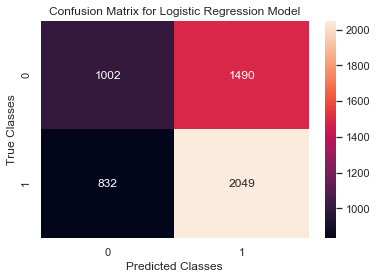

<Figure size 720x720 with 0 Axes>

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_lr, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Logistic Regression Model")
plt.show()

### Model Building & Training - Support Vector Machine (Linear)

In [25]:
from sklearn.svm import SVC
svml = SVC(kernel = "linear", random_state = 0)
svml.fit(X_train, y_train)
y_pred_svml = svml.predict(X_test)

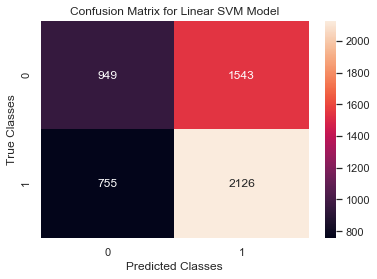

<Figure size 720x720 with 0 Axes>

In [26]:
cm_svml = confusion_matrix(y_test, y_pred_svml)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_svml, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Linear SVM Model")
plt.show()

### Model Building & Training - Radial Basis SVM

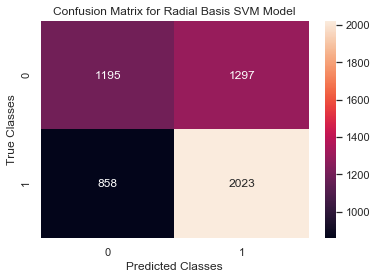

<Figure size 720x720 with 0 Axes>

In [27]:
svmr = SVC(kernel = "rbf", random_state = 0)
svmr.fit(X_train, y_train)
y_pred_svmr = svmr.predict(X_test)

cm_svmr = confusion_matrix(y_test, y_pred_svmr)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_svmr, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Radial Basis SVM Model")
plt.show()

### Model Building & Training - Random Forest Classifier

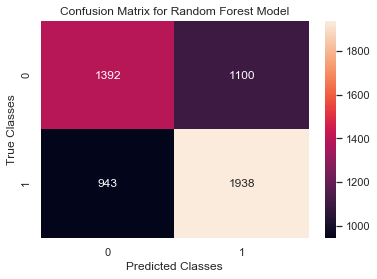

<Figure size 720x720 with 0 Axes>

In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 0,
                                      n_estimators = 100,
                                      criterion = "entropy")
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_rf, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Random Forest Model")
plt.show()

### Model Evaluation

In [57]:
columns = ["Model", "Accuracy", "Precision", "Recall", "f1-Score"]
models = [logistic_regression, svml, svmr, random_forest]
model_names = ["Logistic Regression (Ridge-Regularized)", "Linear SVM", "Radial Basis SVM", "Random Forest"]
models_comparisons = pd.DataFrame()
for i in range(0, len(models)):
    y_pred = models[i].predict(X_test)
    name = model_names[i]
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    values = [name, acc, rec, prec, f1]
    zipped = zip(columns, values)
    new_dict = dict(zipped)
    models_comparisons = models_comparisons.append(new_dict, ignore_index = True)
    models_comparisons = models_comparisons.reindex(columns = columns)

models_comparisons

,Model,Accuracy,Precision,Recall,f1-Score
0,Logistic Regression (Ridge-Regularized),0.567839,0.711211,0.578977,0.638318
1,Linear SVM,0.572306,0.737938,0.579449,0.649160
2,Radial Basis SVM,0.598921,0.702187,0.609337,0.652475
3,Random Forest,0.619765,0.672683,0.637920,0.654840


In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_forest,
                            X = X_train,
                            y = y_train,
                            cv = 10)
print("Random Forest Classifier Accuracy: %0.2f +/- %0.2f" % (accuracies.mean(), 2 * accuracies.std()))

Random Forest Classifier Accuracy: 0.63 +/- 0.01


Out of the 4 models we used, based on the accuracy metric, further supported by 10-fold cross validation, we conclude that the random forest model is the best model.

### Fine-tuning the Random Forest Model

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# We perform grid search to fine tune the random forest model hyperparameters
# Round 1: Entropy

parameters = {"max_depth": [3, None], 
             "max_features": [1, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

# n_jobs = -1 means use all of the computer's cores to perform
# the computation
grid_search = GridSearchCV(estimator = random_forest,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Grid Search took %0.2f seconds" % (t1 - t0))

Grid Search took 2100.00 seconds


In [37]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6339866934986018,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

In [41]:
# Round 2: Fine-tuning based on first round

parameters = {"max_depth": [None], 
             "max_features": [3, 5, 7],
              "min_samples_split": [1, 2, 3],
              "min_samples_leaf": [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["entropy"]}

# n_jobs = -1 means use all of the computer's cores to perform
# the computation
grid_search = GridSearchCV(estimator = random_forest,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

In [42]:
print("Grid Search took %0.2f seconds" % (t1 - t0))
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Grid Search took 367.06 seconds


(0.6339866934986018,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

We obtain the exact same results as we had in the first round.

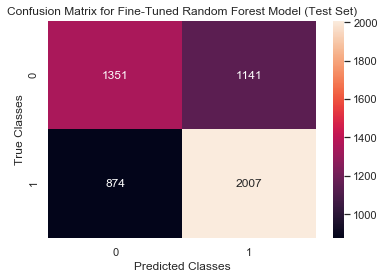

<Figure size 720x720 with 0 Axes>

In [43]:
y_pred = grid_search.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_rf, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Fine-Tuned Random Forest Model (Test Set)")
plt.show()

In [58]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
new_dict = {"Model": "Fine-Tuned Random Forest Model", "Accuracy": acc, "Precision": prec, "Recall": rec, "f1-Score": f1} 
models_comparisons = models_comparisons.append(new_dict, True)
models_comparisons

,Model,Accuracy,Precision,Recall,f1-Score
0,Logistic Regression (Ridge-Regularized),0.567839,0.711211,0.578977,0.638318
1,Linear SVM,0.572306,0.737938,0.579449,0.649160
2,Radial Basis SVM,0.598921,0.702187,0.609337,0.652475
3,Random Forest,0.619765,0.672683,0.637920,0.654840
4,Fine-Tuned Random Forest Model,0.619765,0.637920,0.672683,0.654840


In [ ]:
final_results = pd.concat([y_test, user_id], axis = 1).dropna()
final_results["predi"]